In [1]:
#Importing all necessary libraries
import pandas as pds
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
features_train = pds.read_csv("training_set_features.csv")
features_test = pds.read_csv("test_set_features.csv")

In [3]:
features_train.head(7)

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo


In [4]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [5]:
# Dropping columns that contain lot of null values as well as unrelated to the prediction
columns = ['health_insurance','employment_industry','employment_occupation','hhs_geo_region','census_msa','employment_status','rent_or_own','marital_status','income_poverty']
features_train.drop(columns,axis=1,inplace=True)
features_test.drop(columns,axis=1,inplace=True)

In [6]:
features_train.set_index(['respondent_id'],inplace=True)

In [7]:
features_train.isnull().sum()

xyz_concern                      92
xyz_knowledge                   116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
household_adults                249
household_children              249
dtype: int64

In [8]:
for cols in features_train.columns:
    print(features_train[cols].value_counts())

xyz_concern
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: count, dtype: int64
xyz_knowledge
1.0    14598
2.0     9487
0.0     2506
Name: count, dtype: int64
behavioral_antiviral_meds
0.0    25335
1.0     1301
Name: count, dtype: int64
behavioral_avoidance
1.0    19228
0.0     7271
Name: count, dtype: int64
behavioral_face_mask
0.0    24847
1.0     1841
Name: count, dtype: int64
behavioral_wash_hands
1.0    22015
0.0     4650
Name: count, dtype: int64
behavioral_large_gatherings
0.0    17073
1.0     9547
Name: count, dtype: int64
behavioral_outside_home
0.0    17644
1.0     8981
Name: count, dtype: int64
behavioral_touch_face
1.0    18001
0.0     8578
Name: count, dtype: int64
doctor_recc_xyz
0.0    19139
1.0     5408
Name: count, dtype: int64
doctor_recc_seasonal
0.0    16453
1.0     8094
Name: count, dtype: int64
chronic_med_condition
0.0    18446
1.0     7290
Name: count, dtype: int64
child_under_6_months
0.0    23749
1.0     2138
Name: count, dtype: int64
health_worker
0

In [9]:
# Filling some null values with majority values in every column
features_train['xyz_concern'].fillna(2,inplace=True)
features_train['xyz_knowledge'].fillna(1,inplace=True)
features_train['behavioral_antiviral_meds'].fillna(0,inplace=True)
features_train['behavioral_avoidance'].fillna(1,inplace=True)
features_train['behavioral_face_mask'].fillna(0,inplace=True)
features_train['behavioral_wash_hands'].fillna(1,inplace=True)
features_train['behavioral_large_gatherings'].fillna(0,inplace=True)
features_train['behavioral_outside_home'].fillna(0,inplace=True)
features_train['behavioral_touch_face'].fillna(1,inplace=True)
features_train['doctor_recc_xyz'].fillna(0,inplace=True)
features_train['doctor_recc_seasonal'].fillna(0,inplace=True)
features_train['chronic_med_condition'].fillna(0,inplace=True)
features_train['child_under_6_months'].fillna(0,inplace=True)
features_train['health_worker'].fillna(0,inplace=True)
features_train['opinion_xyz_vacc_effective'].fillna(4,inplace=True)
features_train['opinion_xyz_risk'].fillna(2,inplace=True)
features_train['opinion_xyz_sick_from_vacc'].fillna(2,inplace=True)
features_train['opinion_seas_vacc_effective'].fillna(4,inplace=True)
features_train['opinion_seas_risk'].fillna(2,inplace=True)
features_train['opinion_seas_sick_from_vacc'].fillna(1,inplace=True)

In [10]:
features_train.isnull().sum()

xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_xyz                   0
doctor_recc_seasonal              0
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
opinion_xyz_vacc_effective        0
opinion_xyz_risk                  0
opinion_xyz_sick_from_vacc        0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
age_group                         0
education                      1407
race                              0
sex                               0
household_adults                249
household_children              249
dtype: int64

In [11]:
features_train.drop(['education','household_adults','household_children','race'],axis=1,inplace=True)

In [12]:
# Categorical encoding
features_train.replace({'Male': 0,'Female': 1})

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,sex
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,1
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,1


In [13]:
age=pds.DataFrame(features_train['age_group'].value_counts())

In [14]:
age.reset_index()

,age_group,count
0,65+ Years,6843
1,55 - 64 Years,5563
2,45 - 54 Years,5238
3,18 - 34 Years,5215
4,35 - 44 Years,3848


In [15]:
catenc = {'18 - 34 Years': 0,'35 - 44 Years': 1,'45 - 54 Years': 2,'55 - 64 Years': 3,'65+ Years': 4} # Categorical encoding

In [16]:
features_train.replace(catenc,inplace=True)
features_train.replace({'Male': 0,'Female': 1},inplace=True)

In [17]:
features_train

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,sex
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,3,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,1,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,4,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,4,1
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,4.0,4.0,2.0,5.0,4.0,2.0,3,1


<Axes: xlabel='xyz_concern'>

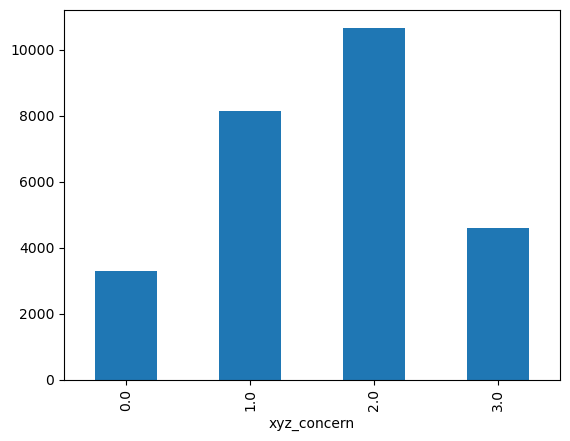

In [18]:
# Constructing some graphs
features_train['xyz_concern'].value_counts().sort_index().plot.bar()

<Axes: xlabel='opinion_seas_vacc_effective'>

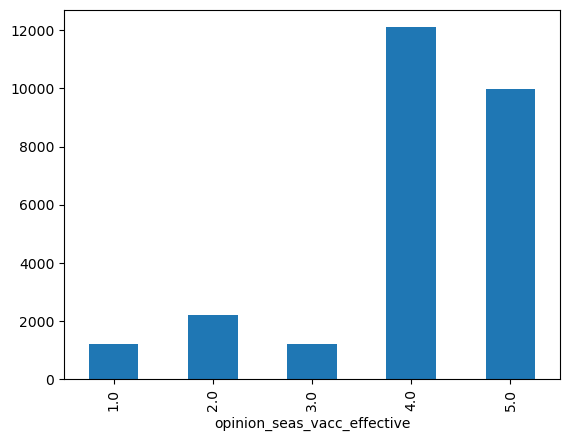

In [19]:
features_train['opinion_seas_vacc_effective'].value_counts().sort_index().plot.bar()

<Axes: xlabel='age_group'>

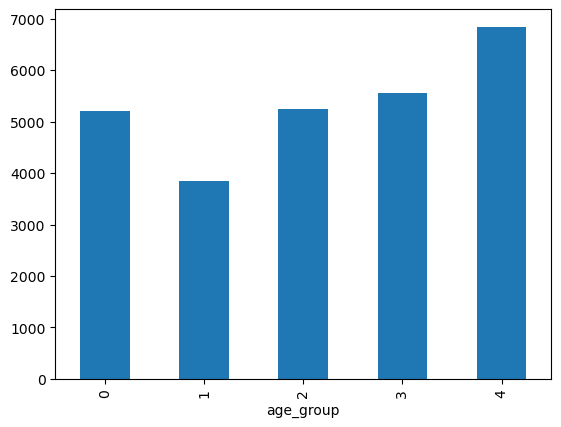

In [20]:
features_train['age_group'].value_counts().sort_index().plot.bar()

In [21]:
# Lets build the model
from sklearn.model_selection import train_test_split # Cross Validation
labels_test = pds.read_csv('training_set_labels.csv')

In [22]:
labels_test.set_index(['respondent_id'],inplace=True)

In [23]:
labels_test_xyz = labels_test['xyz_vaccine']
labels_test_seasonal = labels_test['seasonal_vaccine']

In [24]:
labels_test_seasonal

respondent_id
0        0
1        1
2        0
3        1
4        0
        ..
26702    0
26703    0
26704    1
26705    0
26706    0
Name: seasonal_vaccine, Length: 26707, dtype: int64

In [63]:
x_train_xyz,x_test_xyz,y_train_xyz,y_test_xyz=train_test_split(features_train,labels_test_xyz,test_size=0.2,random_state=42,stratify=labels_test_xyz)
print("Size of X_train is:{}\nSize of Y_train is:{}\nSize of X_test is:{}\nSize of Y_test is:{}\n".format(x_train_xyz.shape,y_train_xyz.shape,x_test_xyz.shape,y_test_xyz.shape))

Size of X_train is:(21365, 22)
Size of Y_train is:(21365,)
Size of X_test is:(5342, 22)
Size of Y_test is:(5342,)



In [64]:
x_train_seasonal,x_test_seasonal,y_train_seasonal,y_test_seasonal=train_test_split(features_train,labels_test_seasonal,test_size=0.2,random_state=42,stratify=labels_test_seasonal)
print("Size of X_train is:{}\nSize of Y_train is:{}\nSize of X_test is:{}\nSize of Y_test is:{}\n".format(x_train_seasonal.shape,y_train_seasonal.shape,x_test_seasonal.shape,y_test_seasonal.shape))

Size of X_train is:(21365, 22)
Size of Y_train is:(21365,)
Size of X_test is:(5342, 22)
Size of Y_test is:(5342,)



In [76]:
# Let's use Logistic Regression
from sklearn import metrics

In [77]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train_xyz,y_train_xyz)
yhat = LR.predict(x_test_xyz)
yhat_prob_xyz = LR.predict_proba(x_test_xyz)
logReg_score=metrics.accuracy_score(y_test_xyz, yhat)
print("LogisticRegression's Accuracy for xyz flu: {0}".format(metrics.accuracy_score(y_test_xyz, yhat)))

LogisticRegression's Accuracy for xyz flu: 0.8356420816173717


In [78]:
LR=LogisticRegression()
LR.fit(x_train_seasonal,y_train_seasonal)
yhat = LR.predict(x_test_seasonal)
yhat_prob_seasonal = LR.predict_proba(x_test_seasonal)
logReg_score=metrics.accuracy_score(y_test_seasonal, yhat)
print("LogisticRegression's Accuracy for seasonal flu: {0}".format(metrics.accuracy_score(y_test_seasonal, yhat)))

LogisticRegression's Accuracy for seasonal flu: 0.7749906402096594


In [79]:
yhat_prob_xyz

array([[0.8207016 , 0.1792984 ],
       [0.0702374 , 0.9297626 ],
       [0.98184023, 0.01815977],
       ...,
       [0.3969193 , 0.6030807 ],
       [0.86222029, 0.13777971],
       [0.97484648, 0.02515352]])

In [80]:
yhat_prob_seasonal

array([[0.96358026, 0.03641974],
       [0.48639477, 0.51360523],
       [0.60461254, 0.39538746],
       ...,
       [0.12338628, 0.87661372],
       [0.73129444, 0.26870556],
       [0.77859375, 0.22140625]])

In [54]:
features_test.set_index(['respondent_id'],inplace=True)

In [55]:
features_test

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,1.0,0.0
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,3.0,0.0
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,1.0,0.0
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,1.0,0.0
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,2.0,4.0,2.0,1.0,35 - 44 Years,NaN,White,Female,1.0,1.0
53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,5.0,2.0,2.0,18 - 34 Years,12 Years,White,Male,1.0,3.0
53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,3.0,1.0,18 - 34 Years,Some College,White,Female,1.0,0.0


In [57]:
features_test.isnull().sum()

xyz_concern                      85
xyz_knowledge                   122
behavioral_antiviral_meds        79
behavioral_avoidance            213
behavioral_face_mask             19
behavioral_wash_hands            40
behavioral_large_gatherings      72
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           932
child_under_6_months            813
health_worker                   789
opinion_xyz_vacc_effective      398
opinion_xyz_risk                380
opinion_xyz_sick_from_vacc      375
opinion_seas_vacc_effective     452
opinion_seas_risk               499
opinion_seas_sick_from_vacc     521
age_group                         0
education                      1407
race                              0
sex                               0
household_adults                225
household_children              225
dtype: int64

In [59]:
for cols in features_test.columns:
    print(features_test[cols].value_counts())

xyz_concern
2.0    10743
1.0     8158
3.0     4523
0.0     3199
Name: count, dtype: int64
xyz_knowledge
1.0    14629
2.0     9515
0.0     2442
Name: count, dtype: int64
behavioral_antiviral_meds
0.0    25307
1.0     1322
Name: count, dtype: int64
behavioral_avoidance
1.0    19336
0.0     7159
Name: count, dtype: int64
behavioral_face_mask
0.0    24840
1.0     1849
Name: count, dtype: int64
behavioral_wash_hands
1.0    22030
0.0     4638
Name: count, dtype: int64
behavioral_large_gatherings
0.0    17273
1.0     9363
Name: count, dtype: int64
behavioral_outside_home
0.0    17647
1.0     8979
Name: count, dtype: int64
behavioral_touch_face
1.0    18174
0.0     8406
Name: count, dtype: int64
doctor_recc_xyz
0.0    19082
1.0     5466
Name: count, dtype: int64
doctor_recc_seasonal
0.0    16360
1.0     8188
Name: count, dtype: int64
chronic_med_condition
0.0    18532
1.0     7244
Name: count, dtype: int64
child_under_6_months
0.0    23660
1.0     2235
Name: count, dtype: int64
health_worker
0

In [60]:
# Filling some null values with majority values in every column
features_test['xyz_concern'].fillna(2,inplace=True)
features_test['xyz_knowledge'].fillna(1,inplace=True)
features_test['behavioral_antiviral_meds'].fillna(0,inplace=True)
features_test['behavioral_avoidance'].fillna(1,inplace=True)
features_test['behavioral_face_mask'].fillna(0,inplace=True)
features_test['behavioral_wash_hands'].fillna(1,inplace=True)
features_test['behavioral_large_gatherings'].fillna(0,inplace=True)
features_test['behavioral_outside_home'].fillna(0,inplace=True)
features_test['behavioral_touch_face'].fillna(1,inplace=True)
features_test['doctor_recc_xyz'].fillna(0,inplace=True)
features_test['doctor_recc_seasonal'].fillna(0,inplace=True)
features_test['chronic_med_condition'].fillna(0,inplace=True)
features_test['child_under_6_months'].fillna(0,inplace=True)
features_test['health_worker'].fillna(0,inplace=True)
features_test['opinion_xyz_vacc_effective'].fillna(4,inplace=True)
features_test['opinion_xyz_risk'].fillna(2,inplace=True)
features_test['opinion_xyz_sick_from_vacc'].fillna(2,inplace=True)
features_test['opinion_seas_vacc_effective'].fillna(4,inplace=True)
features_test['opinion_seas_risk'].fillna(2,inplace=True)
features_test['opinion_seas_sick_from_vacc'].fillna(1,inplace=True)

In [61]:
features_test.drop(['education','household_adults','household_children','race'],axis=1,inplace=True)
features_test.replace({'Male': 0,'Female': 1},inplace=True)
features_test.replace(catenc,inplace=True)

In [62]:
features_test

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,sex
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,5.0,1.0,1.0,5.0,1.0,1.0,1,1
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,0,0
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,5.0,4.0,2.0,5.0,4.0,4.0,3,0
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,4.0,2.0,2.0,4.0,4.0,2.0,4,1
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,4.0,2.0,2.0,4.0,2.0,1.0,1,1
53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,4.0,1.0,1.0,5.0,2.0,2.0,0,0
53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,3.0,1.0,4.0,3.0,1.0,0,1


In [84]:
submission = LR.predict_proba(features_test)

In [85]:
submission.shape

(26708, 2)

In [86]:
submission

array([[0.73381491, 0.26618509],
       [0.91945779, 0.08054221],
       [0.32220479, 0.67779521],
       ...,
       [0.78637174, 0.21362826],
       [0.64153882, 0.35846118],
       [0.42924662, 0.57075338]])

In [95]:
submission_csv = pds.DataFrame({'respondent_id': [i for i in range(26707,53415)], 'h1n1_vaccine': submission[:,0], 'seasonal_vaccine': submission[:,1]})

In [96]:
submission_csv

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.733815,0.266185
1,26708,0.919458,0.080542
2,26709,0.322205,0.677795
3,26710,0.132199,0.867801
4,26711,0.453232,0.546768
...,...,...,...
26703,53410,0.531934,0.468066
26704,53411,0.651006,0.348994
26705,53412,0.786372,0.213628
26706,53413,0.641539,0.358461


In [97]:
submission_csv.to_csv('submission.csv', index=False)